<a href="https://colab.research.google.com/github/delhian/try_pytorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [19]:
X_numpy, y_numpy = datasets.make_regression(n_samples=30, n_features=1,noise=10,random_state=13)

In [20]:

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32)).unsqueeze(-1)

In [21]:
X.shape, Y.shape

(torch.Size([30, 1]), torch.Size([30, 1]))

In [22]:
n_samples, n_features = X.shape
model = nn.Linear(in_features= n_features, out_features=n_features)

In [23]:
loss = nn.MSELoss()
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [24]:
epoches = 100
for epoch in range(epoches):
  Y_predicted = model(X)
  l = loss(Y, Y_predicted)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
  if epoch%10 == 0:
    [w, b] = model.parameters()
    print(f'epoch:{epoch + 1} loss: {l:.8f}')

epoch:1 loss: 5922.21289062
epoch:11 loss: 813.91687012
epoch:21 loss: 182.17953491
epoch:31 loss: 91.67362213
epoch:41 loss: 77.19928741
epoch:51 loss: 74.72589874
epoch:61 loss: 74.28830719
epoch:71 loss: 74.20955658
epoch:81 loss: 74.19529724
epoch:91 loss: 74.19268036


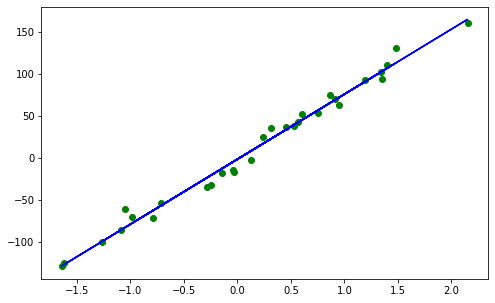

In [25]:
predicted = model(X).detach().numpy()

plt.figure(figsize = (8, 5))

plt.plot(X_numpy, y_numpy, 'go')
plt.plot(X_numpy, predicted, 'b')
plt.show()